# Bangkok Airbnb Data Visualizations

## 1. Importing necessary libraries & files

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Importing Files
df_listings = pd.read_csv('Bangkok.csv')
df_calendar = pd.read_csv('bangkok_calendar.csv')

## 2. Dataset Preview and cleaning 

### Dataset 1: (df_listings) cleaning

In [2]:
# Viewing listings datasets key information
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17040 non-null  int64  
 1   listing_url                                   17040 non-null  object 
 2   scrape_id                                     17040 non-null  int64  
 3   last_scraped                                  17040 non-null  object 
 4   name                                          17032 non-null  object 
 5   description                                   16057 non-null  object 
 6   neighborhood_overview                         9851 non-null   object 
 7   picture_url                                   17040 non-null  object 
 8   host_id                                       17040 non-null  int64  
 9   host_url                                      17040 non-null 

#### Creating new table containing only desired columns & dropping rows with missing values or duplicate rows.

In [3]:
# Creating new table (df1) including only desired columns
df1 = df_listings[['name','host_name','neighbourhood_cleansed','property_type','availability_365','room_type','accommodates','bedrooms','beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews','host_is_superhost','review_scores_rating']]

# Dropping/removing rows with missing values
df1 = df1.dropna()

# Dropping/removing duplicate rows
df1[df1.duplicated(keep=False)]
df1 = df1.drop_duplicates(keep="first")

#### Changing the price column from a Str (text) to a float (number with decimals).

- Although the price is stated in $, I believe that the value is in fact in Thai Baht.
- I also filtered out the price outliers (there was one listing with a price of 330,000.00THB per night).

In [4]:
# Removing string attributes so data can be translated into a float
df1['price'] = df1['price'].str.replace('$','')
df1['price'] = df1['price'].str.replace(',','')

# Changing data from String to Float
df1['price'] = df1['price'].astype(float)

# Removing outlier datapoints
df1 = df1[df1['price'] < 200000]

# Viewing cleaned data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 17021
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    8908 non-null   object 
 1   host_name               8908 non-null   object 
 2   neighbourhood_cleansed  8908 non-null   object 
 3   property_type           8908 non-null   object 
 4   availability_365        8908 non-null   int64  
 5   room_type               8908 non-null   object 
 6   accommodates            8908 non-null   int64  
 7   bedrooms                8908 non-null   float64
 8   beds                    8908 non-null   float64
 9   amenities               8908 non-null   object 
 10  price                   8908 non-null   float64
 11  minimum_nights          8908 non-null   int64  
 12  maximum_nights          8908 non-null   int64  
 13  number_of_reviews       8908 non-null   int64  
 14  host_is_superhost       8908 non-null  

/var/folders/fj/2yr6_qcj5yngwl6h2q1db7kh0000gp/T/ipykernel_54589/2061354694.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace('$','')


#### Basic description of cleaned data.

Description of columns

- name = Title of listed property
- host_name = Name of host (Seller name)
- neighbourhood_cleansed = Neighbourhood name of listing
- property_type = Type of property
- availability_365 = Number of days within the next 365 days that listings are open for tenants.
- room_type = Type of room
- accommodates = How many people the listing can accommodate
- bedrooms = Number of bedrooms
- beds = Number of beds
- amenities = Useful features & included items of the listings
- price = Daily rate of listings in Thai Baht
- minimum_nights = Minimum amount of nights a buyer can stay at the listing
- maximum_nights = Maximum amount of nights a buyer can stay at the listing
- number_of_reviews = Number of reviews a listing recieves
- host_is_superhost = Whether or not a host has gained "Superhost" award (Award for being a good host)
- review_scores_rating = Average rating score out of 5

In [5]:
# Basic analysis on numerical (Int or Float) data
df1.describe()

availability_365  accommodates     bedrooms         beds  \
count       8908.000000   8908.000000  8908.000000  8908.000000   
mean         254.162887      3.347328     1.354737     1.979681   
std          123.679149      2.330486     0.929116     2.129240   
min            0.000000      1.000000     1.000000     1.000000   
25%          159.000000      2.000000     1.000000     1.000000   
50%          326.000000      2.000000     1.000000     1.000000   
75%          364.000000      4.000000     1.000000     2.000000   
max          365.000000     16.000000    20.000000    50.000000   

               price  minimum_nights  maximum_nights  number_of_reviews  \
count    8908.000000     8908.000000     8908.000000        8908.000000   
mean     1920.734059       10.669735      845.566794          25.027616   
std      4906.146316       36.768008     1558.185692          46.263807   
min       270.000000        1.000000        1.000000           1.000000   
25%       750.000000        1.000000      365.000000           2.000000   
50%      1133.500000        1.000000     1125.000000           7.000000   
75%      1800.000000        5.000000     1125.000000          27.000000   
max    160000.000000     1125.000000    99999.000000        1116.000000   

       review_scores_rating  
count           8908.000000  
mean               4.545370  
std                0.868616  
min                0.000000  
25%                4.500000  
50%                4.800000  
75%                5.000000  
max                5.000000

From the table above we notice:

    1. Although the availability average is 254 days, the majority of sellers list their properties as available for over 300 days.
    
    2. Although a listing accommodates an average of approximately 3 people, the averages for bedrooms and beds are much lower at approximately 1 & 2 respectively. This suggests that either sellers do not list their bedroom & bed numbers accurately, or sellers offer alternative sleeping amenities.
    
    3. Although the average daily rate is 1,920THB, the max price is 160,000THB, demonstrating a wide range of prices with the majority of prices below and around 1,920THB.
    
    4. Although the mean min-nights listed is 10.66, over 50% of sellers set their min-nights to 1
    
    5. 25% of sellers post their max-nights to under a year, whereas, most sellers (Over 50%) list their max-nights up to over 3 years (1125 nights).
    
    6. All listings have at least 1 rating with a high average rating of 4.5 and a narrow standard deviation of 0.87.

### Dataset 2 (df_calendar) basic cleaning.

Data prepared for use in a timeseries chart. 
- Changing prices from string (text) to float (Number with decimals)
- Dropping rows with missing values
- Changing the date from a string to a datetime format
- Creating a column to display just the month
- Filtering out outliers (One value thats over 200,000THB per night)

In [6]:
# Removing string attributes so data can be translated into a float
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].str.replace('$','')
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].str.replace(',','')

# Changing data from String to Float
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].astype(float)

# Removing string attributes so data can be translated into a float
df_calendar['price'] = df_calendar['price'].str.replace('$','')
df_calendar['price'] = df_calendar['price'].str.replace(',','')

# Changing data from String to Float
df_calendar['price'] = df_calendar['price'].astype(float)

# Dropping/removing rows with missing values
df_calendar.dropna()

# Changing "datetime" from string to "datetime" data
df_calendar["datetime"] = pd.to_datetime(df_calendar["date"])

# Creating new column with only month stated
df_calendar["month"] = df_calendar["datetime"].dt.month

# Removing outlier datapoints
df_calendar = df_calendar[df_calendar['price'] < 200000]

# Viewing cleaned data
df_calendar

/var/folders/fj/2yr6_qcj5yngwl6h2q1db7kh0000gp/T/ipykernel_54589/945406366.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['adjusted_price'] = df_calendar['adjusted_price'].str.replace('$','')
/var/folders/fj/2yr6_qcj5yngwl6h2q1db7kh0000gp/T/ipykernel_54589/945406366.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].str.replace('$','')


listing_id        date available   price  adjusted_price  \
0          39012138  2021-12-24         f   714.0           714.0   
1          39012138  2021-12-25         f   714.0           714.0   
2          39012138  2021-12-26         f   714.0           714.0   
3          39012138  2021-12-27         f   714.0           714.0   
4          39012138  2021-12-28         f   714.0           714.0   
...             ...         ...       ...     ...             ...   
6219210    39925502  2022-12-19         f  2574.0          2574.0   
6219211    39925502  2022-12-20         f  2574.0          2574.0   
6219212    39925502  2022-12-21         f  2574.0          2574.0   
6219213    39925502  2022-12-22         f  2574.0          2574.0   
6219214    39925502  2022-12-23         f  2574.0          2574.0   

         minimum_nights  maximum_nights   datetime  month  
0                  14.0          1125.0 2021-12-24     12  
1                  14.0          1125.0 2021-12-25     12  
2                  14.0          1125.0 2021-12-26     12  
3                  14.0          1125.0 2021-12-27     12  
4                  14.0          1125.0 2021-12-28     12  
...                 ...             ...        ...    ...  
6219210             1.0            30.0 2022-12-19     12  
6219211             1.0            30.0 2022-12-20     12  
6219212             1.0            30.0 2022-12-21     12  
6219213             1.0            30.0 2022-12-22     12  
6219214             1.0            30.0 2022-12-23     12  

[6216650 rows x 9 columns]

## 4. Questions in mind

    1. How does the neighbourhood effect average listing price?
    2. How does the room type and number of beds effect average listing price?
    3. How does the average price change when "fast wifi" is included in the amenities?
    4. Can price be accurately predicted using other variables?
    5. Does the average price of listings change throughout the year?

### Question 1: How does the neighbourhood effect average listing price?

#### Description of code:

- Grouped all data by neighbourhoods
- Calculated means for each neighbourhood
- Values sorted in ascending order by prices (to see which neighbourhood areas are most cheap or expensive)
- Plot bar chart for neighbourhoods and average prices
- Defined length and width of chart for aesthetic purposes

Then I repeated the above steps using a single "room type" to collect more consistent district data
- Created a new dataset with only values for room type "Private room"
    - I chose "Private room" because there is little variation in types of private rooms hence the price ranges are not as dramatic as listings that go under "Entire home/apt". I also chose it because of the high number of listings under this title so there is still a large data pool.

In [7]:
# Grouping data by neighbourhoods
df_NC = df1.groupby("neighbourhood_cleansed")

# Calculating means for all numerical columns for each neighbourhood
df_NC = df_NC.mean()

# Sorting values in ascending order by price
df_NC = df_NC.sort_values(by='price').reset_index()

# Viewing new datasheet
df_NC.head(5)

neighbourhood_cleansed  availability_365  accommodates  bedrooms      beds  \
0             Nong Khaem        181.000000      2.000000  1.000000  1.000000   
1               Bang Bon        365.000000      2.000000  1.000000  2.000000   
2            Khan Na Yao        203.944444      2.444444  1.166667  1.277778   
3             Thung khru        282.000000      2.333333  1.833333  2.000000   
4        Wang Thong Lang        288.428571      3.000000  1.040816  1.142857   

        price  minimum_nights  maximum_nights  number_of_reviews  \
0  500.000000        2.000000     1125.000000           1.000000   
1  590.000000       14.000000      360.000000           1.000000   
2  729.000000       17.666667      658.333333          12.111111   
3  786.166667        2.000000      339.500000           3.000000   
4  825.857143        2.204082      899.836735           7.938776   

   review_scores_rating  
0              5.000000  
1              5.000000  
2              4.681111  
3              5.000000  
4              4.485510

In [8]:
# Creating bar chart to display average prices for each neighbourhood
alt.Chart(df_NC, title='Average prices of different neighbourhoods').mark_bar().encode(
    x='neighbourhood_cleansed:N', 
    y='price:Q'
).properties(
    width=900,
    height=250
)

alt.Chart(...)

As seen from the bar chart above the "Taling Chan" and "Nong Chok" districts seem to be the most expensive districts around Bangkok.
- Since both these districts along with some other more expensive listed areas are along the outskirts of Bangkok (Or at least non-central), I believe that this is due to a few large expensive outlying properties in the areas.
- More accurate district price data can be collected if we only use a single room type with a small range of square footages in the dataset.

#### Repeating above steps but only using the data of one room type to calculate average prices per district:

In [9]:
# Viewing room types and how many datapoints in each
df1['room_type'].value_counts()

Entire home/apt    5549
Private room       2593
Hotel room          499
Shared room         267
Name: room_type, dtype: int64

In [10]:
# Creating a dataset with only "Private room" listings
df_NC1 = df1[df1['room_type'] == 'Private room']

# Grouping data by neighbourhoods
df_NC1 = df_NC1.groupby("neighbourhood_cleansed")

# Calculating means for all numerical columns for each neighbourhood
df_NC1 = df_NC1.mean()

# Sorting values in ascending order by price
df_NC1 = df_NC1.sort_values(by='price').reset_index()

# Viewing new datasheet
df_NC1.head(5)

neighbourhood_cleansed  availability_365  accommodates  bedrooms      beds  \
0             Nong Khaem        181.000000      2.000000  1.000000  1.000000   
1                Sai Mai        296.833333      4.500000  1.500000  2.500000   
2         Thawi Watthana        242.333333      1.666667  1.333333  1.666667   
3            Khan Na Yao        196.500000      1.833333  1.000000  1.000000   
4             Thung khru        134.000000      2.000000  3.500000  3.500000   

        price  minimum_nights  maximum_nights  number_of_reviews  \
0  500.000000        2.000000     1125.000000           1.000000   
1  574.833333        1.500000      760.000000           8.333333   
2  626.666667        1.000000      753.666667           4.000000   
3  628.333333        1.833333      760.000000           1.666667   
4  700.000000        3.000000      186.000000           1.000000   

   review_scores_rating  
0              5.000000  
1              4.746667  
2              3.473333  
3              4.583333  
4              5.000000

In [11]:
# Creating bar chart to display average prices for each neighbourhood
alt.Chart(df_NC1, title='Average prices of different neighbourhoods using only "private rooms" data').mark_bar().encode(
    x='neighbourhood_cleansed:N', 
    y='price:Q'
).properties(
    width=900,
    height=250
)

alt.Chart(...)

Now with more standardized listings we can see the disparities in districts more clearly and accurately.
- As the table above depicts, districts more central in Bangkok generally have a higher average price. These include districts such as "Khlong Toei", "Sathon", "Yan na wa" and "Bangkok Yai". 
- There are still however some expensive districts on the outskirts of Bankok such as "Saphan Sung" and "Nong Chok". 

### Question 2: How does the room type and number of beds effect average listing price?

#### Description of code:

- Shortened the dataset by randomly removing 4000 values so that a simple chart can be created.
- Created a 3 variable scatterplot with tooltip (To view additional information)

In [12]:
# Selecting 4000 random rows in the dataset
drop_rows = default_rng().choice(df1.index, size=4000, replace=False)

# Dropping 4000 randomly selected rows
df_dropped = df1.drop(index=drop_rows)

In [13]:
# Creating chart to display 3 variable data
alt.Chart(df_dropped, title='Comparing room type and number of beds with listing prices').mark_circle(size = 60).encode(
    x = 'beds',
    y = 'price',
    color = 'room_type',
    tooltip =['property_type','host_name','neighbourhood_cleansed']
)

alt.Chart(...)

From the graph above, we can see that Entire homes/apt and Private rooms warrent most of the higher prices (>20,000 per night).

We can also see that in general, the more beds a listing offers, the lower the price per night is (With a few exceptions). This is likely due to hosts piling multiple beds per room.

It is also interesting to see that most properties around the 100,000THB a day range are listed by the same host (Nathaporn).

### Question 3: How does the average price change when "fast wifi" is included in the amenities?

####  Description of code:

- First determined how many times the word "Wifi" appears in the amenities column
    - Wifi also appears in lowercase so is missing a few values
- Then, determined which properties include "fast wifi" within the "amenities" section.
- Grouped listing prices with "fast wifi" and without "fast wifi" together, averaged the prices & created a basic bar chart to display data.

In [14]:
# Defining searchword
searchword = "Wifi"

# Creating new dataset with only amenities and price columns
df_wifi = df1[['amenities','price']]

# Defining variables
mylist = df_wifi.amenities
i=0
j=0

# Counting rows and rows where searchword is found
for title in mylist:
    j=j+1
    if title.find(searchword) != -1:
        i=i+1

# Printing results in sentence form
print("I found the searchword", searchword, i, "times out of", j, "in the amenities collumn")

I found the searchword Wifi 8255 times out of 8908 in the amenities collumn


- This shows that almost all properties claim to have wifi as one of their amenities

In [15]:
# Defining new searchwords
searchword1 = {'fast','wifi'}

# Creating new column that identifies when a row contains the searchwords
df_wifi['found'] = df_wifi['amenities'].apply(lambda x: sum(i in searchword1 for i in x.split()))

# Viewing new column & counting values found 
df_wifi['found'].value_counts()

/var/folders/fj/2yr6_qcj5yngwl6h2q1db7kh0000gp/T/ipykernel_54589/70041399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wifi['found'] = df_wifi['amenities'].apply(lambda x: sum(i in searchword1 for i in x.split()))


0    8886
1      22
Name: found, dtype: int64

1 represents rows where "fast wifi" is found and 0 represents rows where the searchwords are not found

In [16]:
# Grouping data by "found" column
df_wifi1 = df_wifi.groupby("found")

# Calculating averages for price
df_wifi1 = df_wifi1.mean()

# Sorting the two values in ascending order by price
df_wifi1 = df_wifi1.sort_values(by='price').reset_index()

# Creating bar chart to display how "fast wifi" affects price
alt.Chart(df_wifi1, title='Average prices of different neighbourhoods').mark_bar().encode(
    x='found:N', 
    y='price:Q'
).properties(
    width=200,
    height=250
)

alt.Chart(...)

As we can see from the bar chart above, listings with the words "Fast wifi", included in the amenities tend to charge a higher price on average.

### Question 4: Can price be accurately predicted using other variables?

####  Description of code:
- Plotted price against certain key variables to see if we can visually see any clear correlations.
- Used dummy variables & a heat map to visualize the numerical correlations between price and all other relavent values.
    - In case prices can be predicted using room type: I separated room types into individual dummy variables (0 or 1).
- Then I performed a linear regression to attempt to predict price based on the closest correlating variable "Bedrooms".
    - Finally, I plotted a graph to visually represent the regression.
    

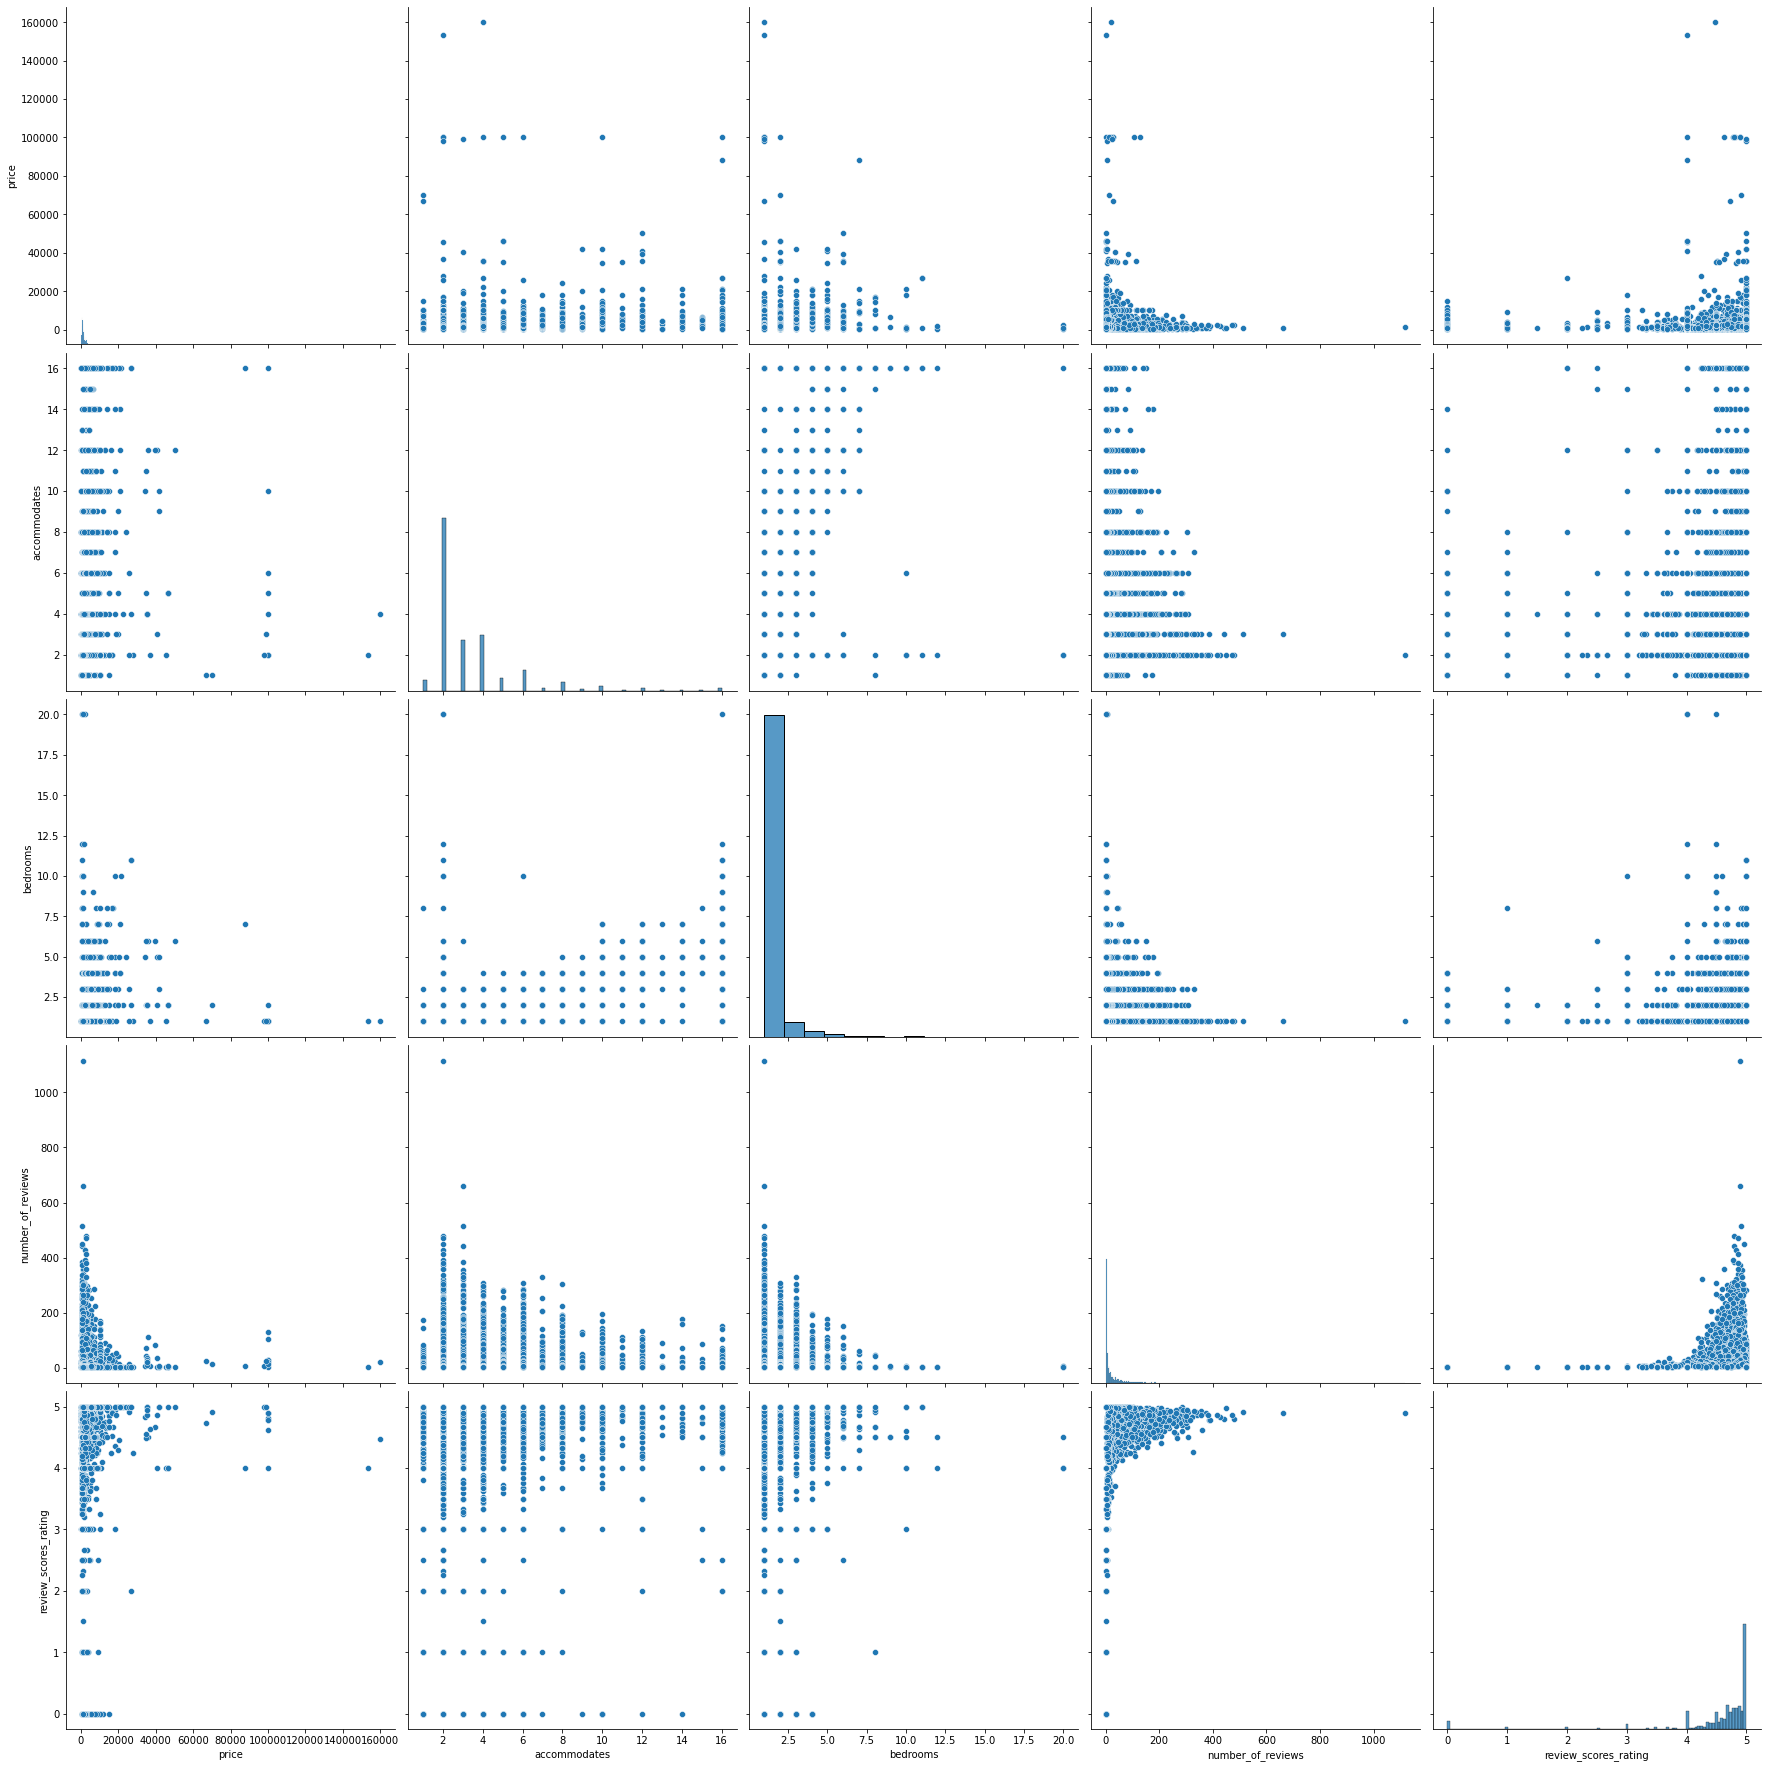

In [17]:
# Creating simple scatterplots to compare price against other numerical values
sns.pairplot(df1[['price', 'accommodates', 'bedrooms', 'number_of_reviews','review_scores_rating']],
             height = 5)

- Based on observations, price can most acurately be predicted using 'bedrooms', 'number_of_reviews' and 'review_scores_rating'.

In [18]:
# Creating dummies to compare correlations between price and room_types
df_dummies = pd.get_dummies(df1, columns=['room_type'])

# Viewing new dataset
df_dummies.head(5)

name host_name  \
0                 Nice room with superb city view    Nuttee   
3  Spacious one bedroom at The Kris Condo Bldg. 3   Sirilak   
5                 Condo with Chaopraya River View  Athitaya   
6                   Sathorn Terrace Apartment(61)       Tor   
8                budget hotel bangkok near subway      Mimi   

  neighbourhood_cleansed                       property_type  \
0            Ratchathewi          Entire condominium (condo)   
3              Din Daeng         Private room in rental unit   
5             Rat Burana         Private room in rental unit   
6               Bang Rak  Private room in serviced apartment   
8              Din Daeng                  Entire rental unit   

   availability_365  accommodates  bedrooms  beds  \
0               362             3       1.0   1.0   
3               278             2       1.0   1.0   
5               365             2       1.0   1.0   
6               360             2       1.0   1.0   
8               365             2       1.0   1.0   

                                           amenities   price  minimum_nights  \
0  ["Wifi", "Hangers", "Elevator", "Long term sta...  1845.0               3   
3  ["Pool", "Free parking on premises", "Washer",...   800.0               5   
5  ["Breakfast", "Free parking on premises", "Kit...  1510.0               3   
6  ["Security cameras on property", "Wifi", "Hang...  1150.0               2   
8  ["Hot tub", "Free parking on premises", "Washe...   910.0               2   

   maximum_nights  number_of_reviews host_is_superhost  review_scores_rating  \
0              90                 65                 f                  4.85   
3             366                  1                 f                  4.00   
5            1095                  1                 f                  5.00   
6             365                 27                 f                  4.77   
8             365                  3                 f                  2.50   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          1                     0                       0   
3                          0                     0                       1   
5                          0                     0                       1   
6                          0                     0                       1   
8                          1                     0                       0   

   room_type_Shared room  
0                      0  
3                      0  
5                      0  
6                      0  
8                      0

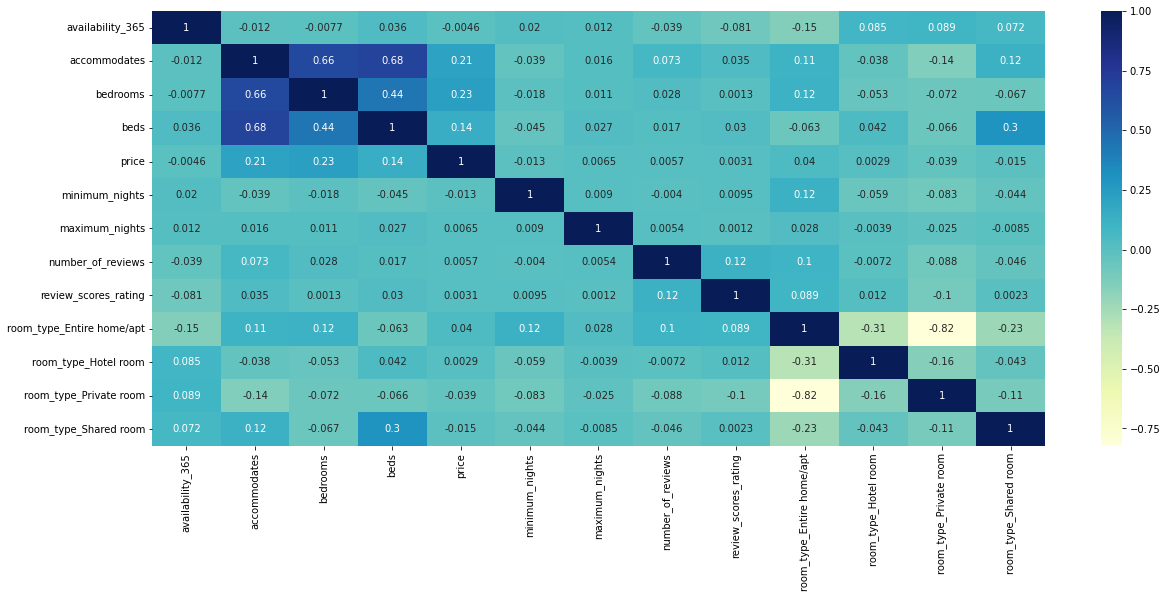

In [19]:
# Creating heatmap to visualize correlations between all numerical values.
fig = plt.figure(figsize = (20, 8))
sns.heatmap(df_dummies.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above heatmap we can conclude that price is not highly correlated with many variables, however its strongest correlation of 0.23 is with bedrooms. Hence, we shall atempt creating a linear regression using bedrooms to predict price.

There are however, strong correlations in a few areas:
- room_type_Entire home/apt is negatively correlated with room_type_Private room by a factor of -0.82
- beds is positively correlated with accommodates by a factor of 0.68
- bedrooms is positively correlated with accommodates by a factor of 0.66

In [20]:
# Creating linear regression to try to predict price using number of bedrooms
x = df_dummies.drop(['availability_365','price','minimum_nights','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','accommodates','beds','review_scores_rating','maximum_nights','number_of_reviews','name','property_type','host_name','neighbourhood_cleansed','amenities','host_is_superhost'],axis = 1).values
y = df_dummies['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.80)

lm = LinearRegression(fit_intercept = True)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_train)

# Printing values in sentence form
print('The accuracy on the testing data is:',lm.score(x_test, y_test).round(3)*100,"Percent")

The accuracy on the testing data is: 6.0 Percent


/var/folders/fj/2yr6_qcj5yngwl6h2q1db7kh0000gp/T/ipykernel_54589/1347399537.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()],


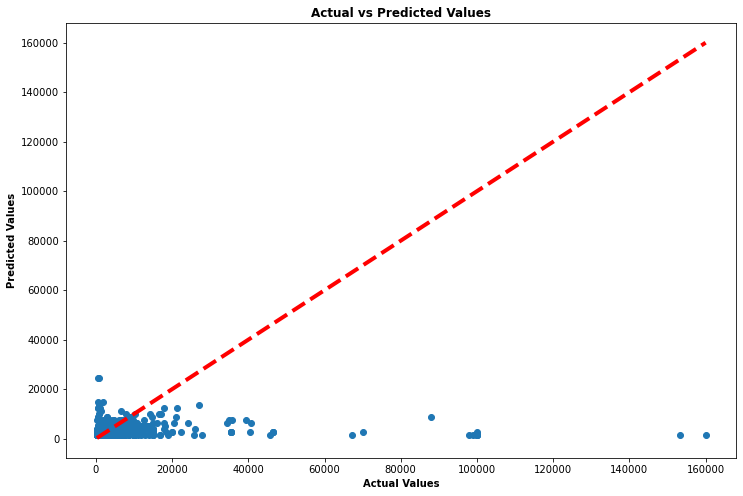

In [21]:
# Creating scatterplot with regression line to display level of accuracy
plt.figure(figsize = (12,8))
plt.scatter(y_train, y_pred);
plt.xlabel('Actual Values', fontweight = 'bold');
plt.ylabel('Predicted Values', fontweight = 'bold');
plt.title('Actual vs Predicted Values', fontweight = 'bold');

plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         'k--', 
         c = 'red',
         lw = 4);

As we can see from the linear regression model and graph above, "Bedrooms" data is not accurate at predicting price.

### Question 5: Does the average price of listings change throughout the year?

- Dataset 2 (df_calendar) is used for this analysis

####  Description of code:
- Grouped data by month & calculated average prices per month
- Created time series graph with defined axis ranges

In [22]:
# Grouping data by "month" column
df_calendar = df_calendar.groupby("month")

# Calculating averages for price 
df_calendar = df_calendar.mean().reset_index()

# Viewing new datasheet
df_calendar

month    listing_id        price  adjusted_price  minimum_nights  \
0       1  2.943957e+07  2330.081139     2319.963507       12.724099   
1       2  2.943957e+07  2335.804264     2315.373349       12.748379   
2       3  2.943957e+07  2341.161855     2318.971191       12.755325   
3       4  2.943957e+07  2348.040885     2326.578189       12.756600   
4       5  2.943957e+07  2352.794712     2331.029148       12.756829   
5       6  2.944023e+07  2363.059504     2340.810837       12.746605   
6       7  2.944090e+07  2373.354932     2351.184061       12.746791   
7       8  2.944090e+07  2369.595587     2348.373206       12.743250   
8       9  2.944213e+07  2363.265781     2342.537114       12.746296   
9      10  2.944238e+07  2358.893847     2338.107007       12.745508   
10     11  2.944238e+07  2356.916339     2337.103629       12.744908   
11     12  2.944191e+07  2313.559812     2293.136686       12.732755   

    maximum_nights  
0     1.765998e+06  
1     1.765998e+06  
2     1.765998e+06  
3     1.765998e+06  
4     1.765998e+06  
5     1.765946e+06  
6     1.765895e+06  
7     1.765895e+06  
8     1.766327e+06  
9     1.766413e+06  
10    1.766413e+06  
11    1.729841e+06

In [23]:
# Plotting time series line chart to display changes in average prices through the months in the year
alt.Chart(df_calendar, title="Monthly change in average prices").mark_line().encode (
    x = alt.X('month', scale=alt.Scale(domain=[1, 12])),
    y = alt.Y('price', scale=alt.Scale(domain=[2300, 2390])),
)

alt.Chart(...)

As we can see from the line graph above, listing prices tend to be on average higher during the rainy season (June - November) and lower during the dry season and new years (December - May).

### 5. Overall conclusions

#### Findings

Based on the results throughout this analysis we can make some basic conclusions about the Airbnb data. 
- Looking at the price data for room type "Private rooms" in each of the different districts around Bangkok, we can conclude that prices are generally higher for listings within central bangkok with a few expensive districts on the outskirts of bangkok. 
- Although room type does generally have an effect on average price, the large price ranges within each room type makes this variable a poor indicator of price. 
- Most properties have wifi listed as an amenity, and although specifying "Fast wifi" seems to warrent a small increase in average prices, a larger dataset would need to be used to confirm any conclusions. 
- As seen from question 4, price cannot be accurately predicted with the information given in this datasheet, I believe that additional information such as "Square footage" would have made predictions far more accurate. 
- As seen from question 5, month & seasons during the year does affect average listing prices in Bangkok. We can see that average prices are lower during christmas and new years and much higher mid-year. This shows that demand for airbnb properties are highest during the cooler months and generally lower in the dry season.

#### Limitations and future plans

Suggestions to improve analysis for future projects:
- Unfortunately "Square_footage" was not a data column listed in this dataset, I believe that would have had a much higher correlation with price.
- If I had more time, I would have also included the "neighbourhood.csv" file in order to perform a GEO map of average prices in districts around Bangkok.

Additional questions I could have asked:
- Does the "Superhost" title result in higher average prices? 
    - if so, how much?
- Does "Number of Reviews" and "Review Scores Rating" affect the amount of days a listing is booked throughout the year?
- How much does Min and Max nights (nights allowed for bookings) affect the amount of days a listing is booked throughout the year?
    - What would be the optimum spread of min-max nights to recieve the most annual revenue?
- Has average prices for listings changed between years?
    - If so, why?